Ref:/glade/u/home/prein/papers/2021_Object-Tracker-Intro/programs/plots/ClimatologicalAnalysis/ClimatologicalAnalysis.ipynb

In [1]:
import os
import datetime
import numpy as np
from netCDF4 import Dataset
import pandas as pd
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy 
import cartopy.crs as ccrs

#### setup input 

In [2]:
sPlotFile = '/glade/u/home/mingge/EURO-CORDEX/'
dir_0 = '/glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/' 
dir_11 = dir_0 + 'EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/annual_feature_frequ/'
dir_44 = dir_0 + 'EUR-44/evaluation/ECMWF-ERAINT/r1i1p1/annual_feature_frequ/'
dataset = ['ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6',
            'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA',
            'ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G',
            'ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1',
            'ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-6',
            'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05']
dir_ds = [dir_44,dir_44,dir_44,dir_11,dir_11,dir_11]
 
# build a dictionary from a list of keys and values
data_dict = dict(zip(dataset, dir_ds))
data_dict
n_ds = len(dataset)
n_ds

6

#### Read the netCDF file

In [3]:
flnm = '/glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc' 
ncid = Dataset(flnm)
Lat=np.squeeze(ncid.variables['lat'][:])
Lon=np.squeeze(ncid.variables['lon'][:])
nx = Lon.shape[0]
ny = Lon.shape[1]
ncid.close()
print('grid is from ', flnm)

grid is from  /glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc


In [4]:
Lon

masked_array(
  data=[[-32.  , -31.89, -31.78, ...,  49.84,  49.95,  50.06],
        [-32.  , -31.89, -31.78, ...,  49.84,  49.95,  50.06],
        [-32.  , -31.89, -31.78, ...,  49.84,  49.95,  50.06],
        ...,
        [-32.  , -31.89, -31.78, ...,  49.84,  49.95,  50.06],
        [-32.  , -31.89, -31.78, ...,  49.84,  49.95,  50.06],
        [-32.  , -31.89, -31.78, ...,  49.84,  49.95,  50.06]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [5]:
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts','MoistureStreams', 'AR', 'MS'] 
n_obj = len(Objects)

In [6]:
dataset

['ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6',
 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA',
 'ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G',
 'ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1',
 'ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-6',
 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05']

In [7]:
#annualObjectFrequency = np.zeros((len(Years), nx, ny, len(Objects)))
#annualObjectFrequency[:] = np.nan
days = 365

ObjectFrequency = np.zeros((n_ds, nx, ny, n_obj))
ObjectFrequency[:] = np.nan
    
for ds in range(len(dataset)):
    print(dataset[ds])
    if dataset[ds] == 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA':
        year_s = 1991 
    elif dataset[ds] == 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05':
        year_s = 1983 
    else:
        year_s = 1979

    year_e = 2010
    n_year = year_e - year_s + 1
    Years = range(year_s, year_e+1)
    
    annualObjectFrequency = np.zeros((n_year, nx, ny, n_obj))
    annualObjectFrequency[:] = np.nan

    for year in Years:
        flnm = dir_ds[ds] + str(year) + "_" + dataset[ds] + '_annual_feature_frequ.npz'
        #print(ds, flnm)
        
        DATA = np.load(flnm)
        mean_cy = DATA['mean_cy']
        mean_acy = DATA['mean_acy']
        mean_pr = DATA['mean_pr']
        mean_anvil = DATA['mean_anvil']
        mean_fr = DATA['mean_fr']
        mean_ivt = DATA['mean_ivt']
        mean_ar = DATA['mean_ar']
        mean_ms =  DATA['mean_ms']
        
        #print('Collect the annual frequency of objects')
        annualObjectFrequency[year-Years[0],:,:,Objects.index('Cyclones')] = mean_cy
        annualObjectFrequency[year-Years[0],:,:,Objects.index('Anticyclones')] = mean_acy
        annualObjectFrequency[year-Years[0],:,:,Objects.index('Precipitation')] = mean_pr
        annualObjectFrequency[year-Years[0],:,:,Objects.index('Anviles')] = mean_anvil
        annualObjectFrequency[year-Years[0],:,:,Objects.index('Fronts')] = mean_fr
        annualObjectFrequency[year-Years[0],:,:,Objects.index('MoistureStreams')] = mean_ivt
        annualObjectFrequency[year-Years[0],:,:,Objects.index('AR')] = mean_ar
        annualObjectFrequency[year-Years[0],:,:,Objects.index('MS')] = mean_ms

    # annual average
    ObjectFrequency[ds] = np.nanmean(annualObjectFrequency, axis = 0)*days    
 

ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA
ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G
ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-6
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05


Cyclones
Anticyclones
Precipitation
Anviles
Fronts
MoistureStreams
AR
MS


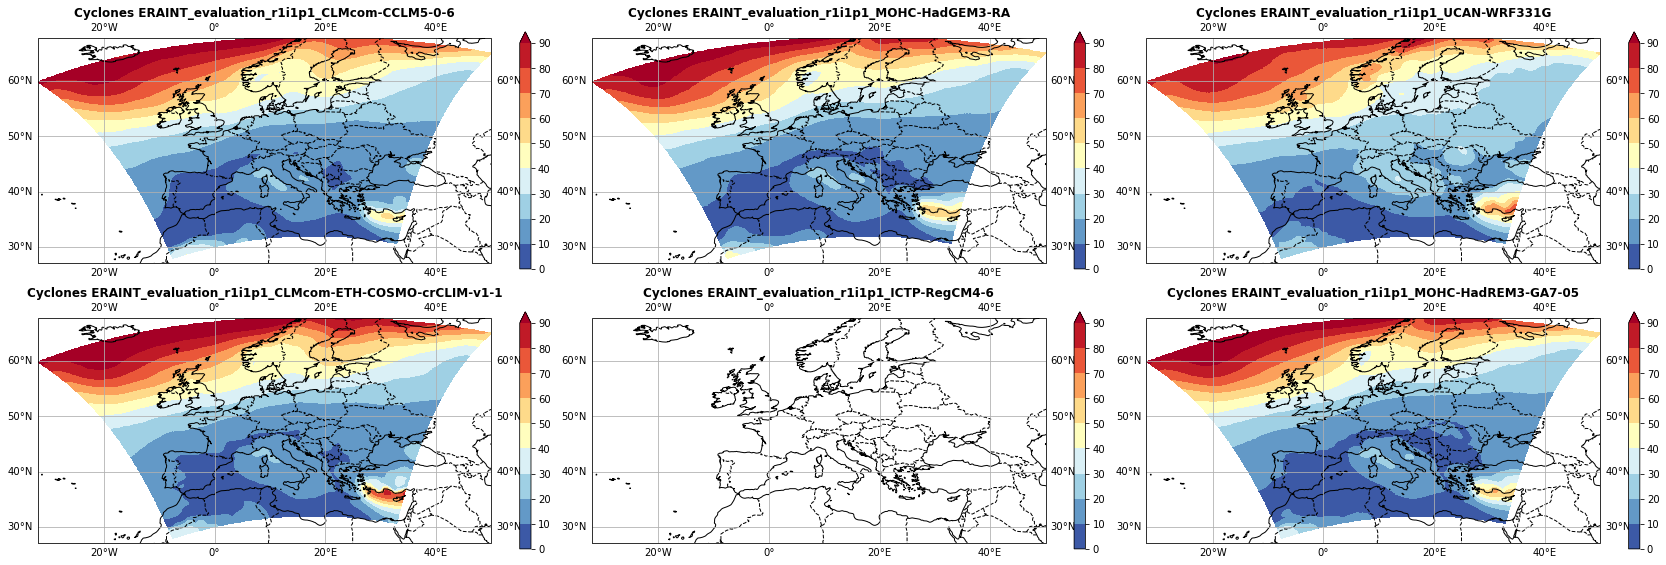

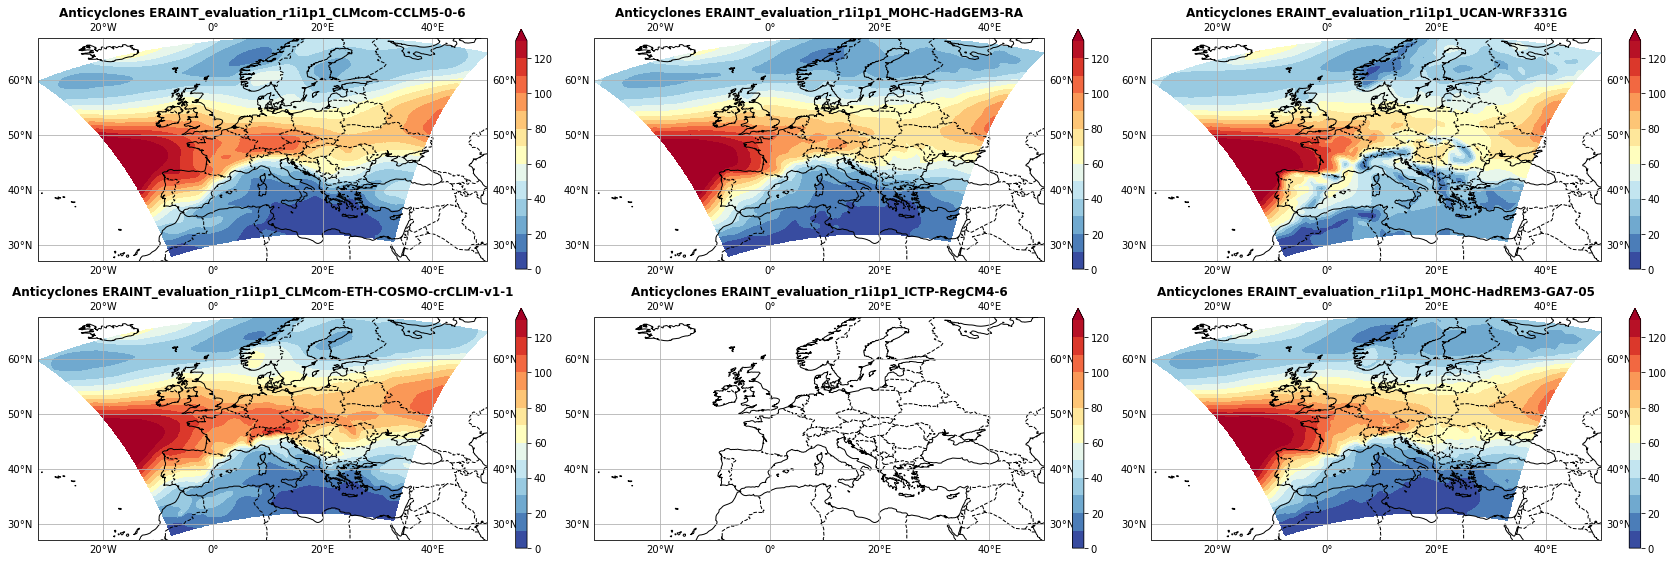

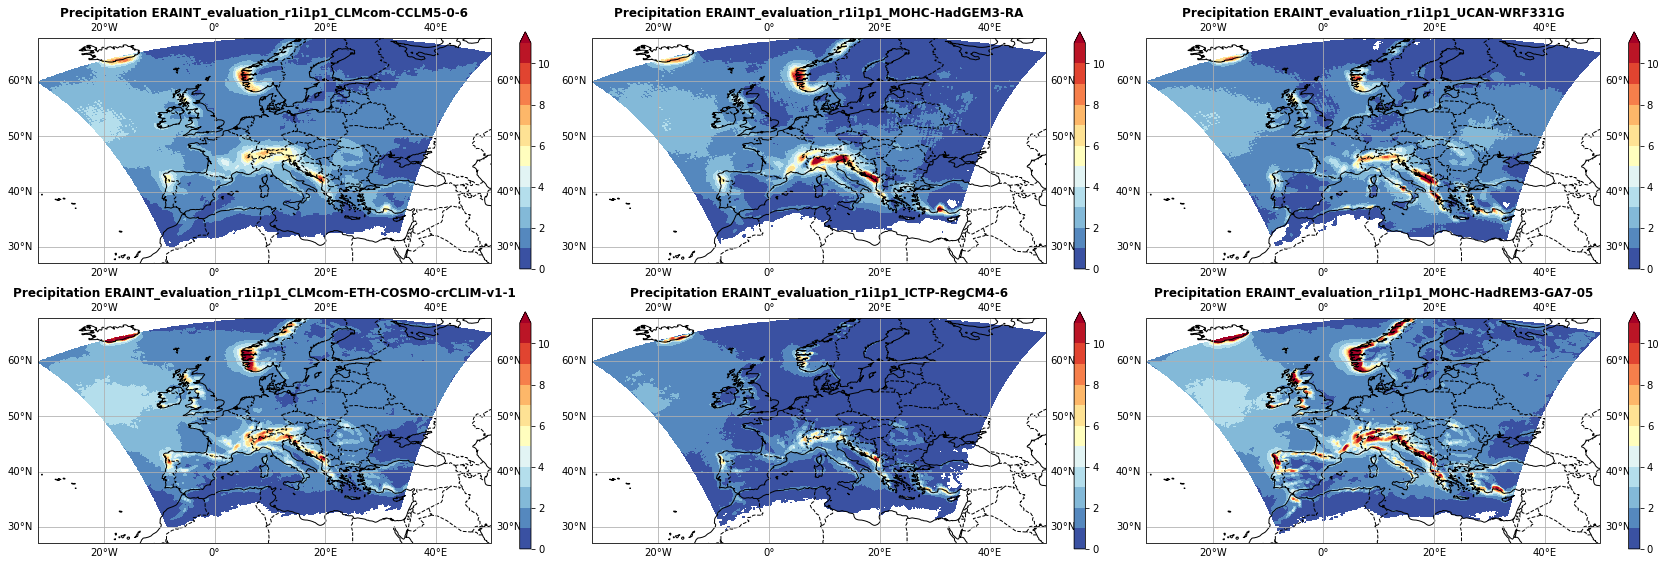

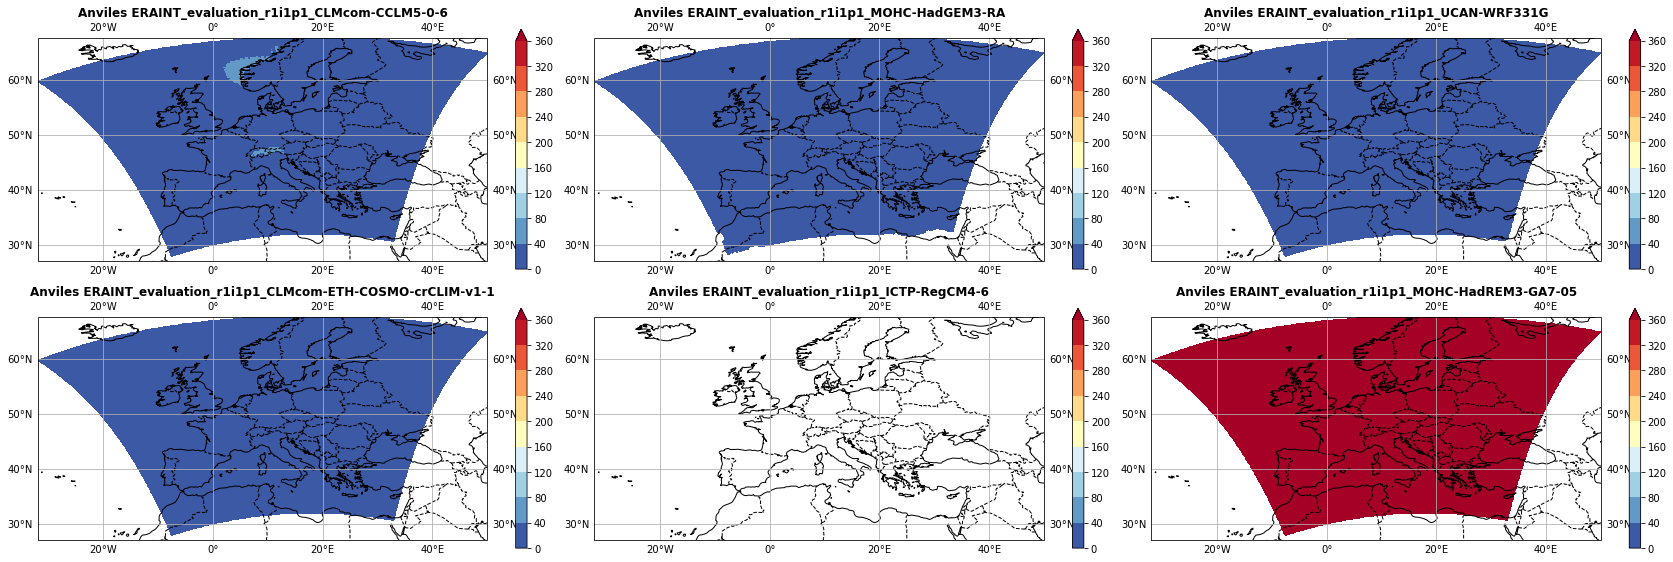

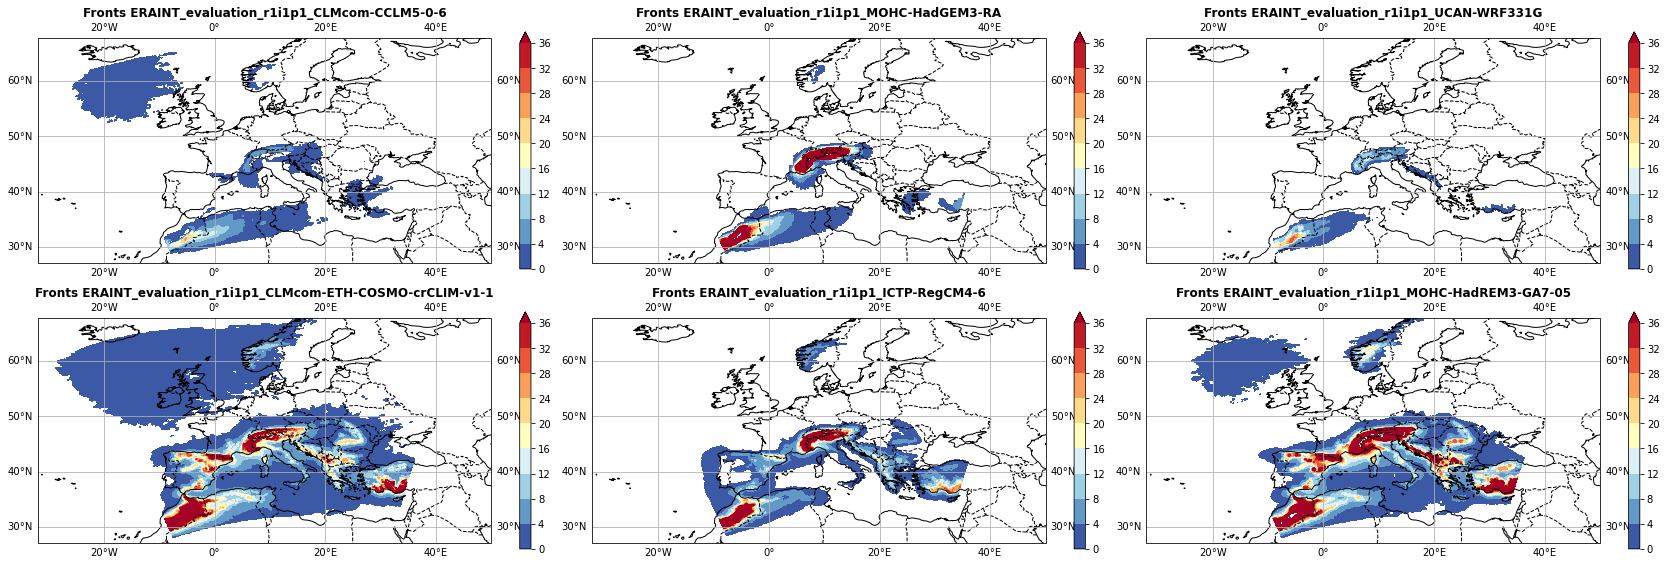

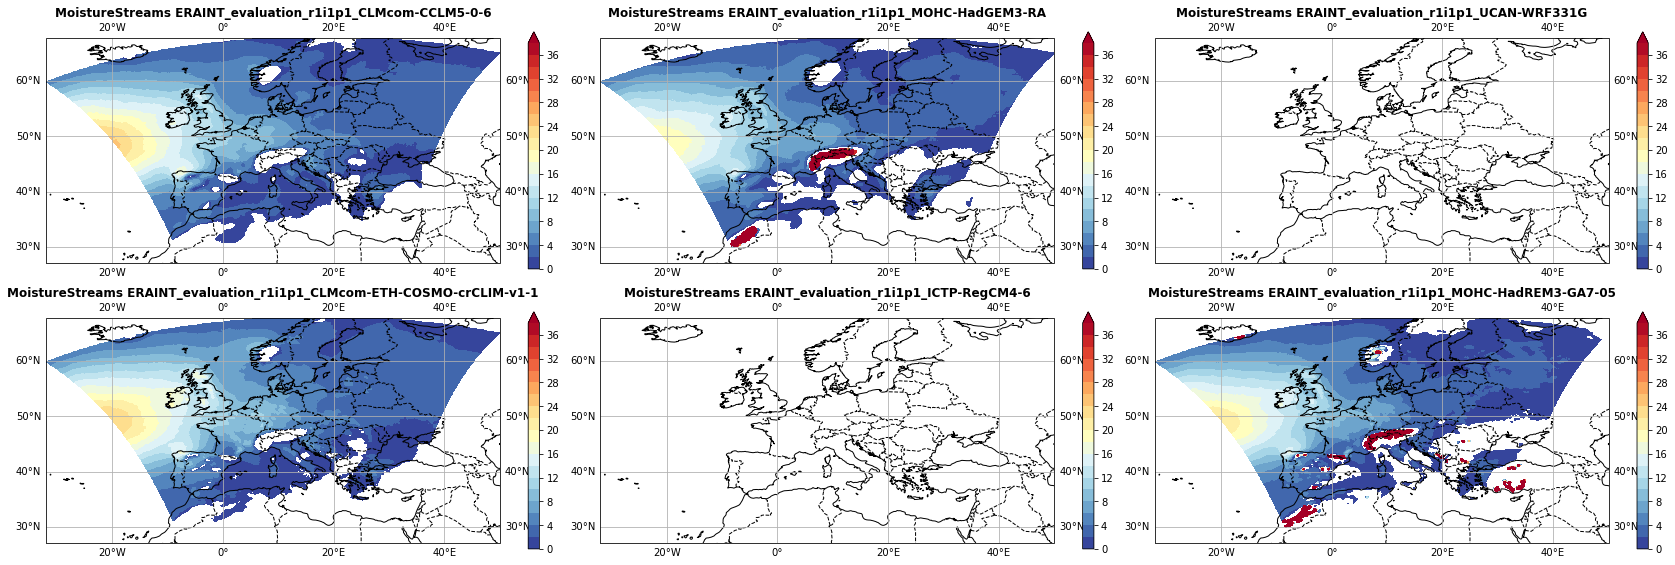

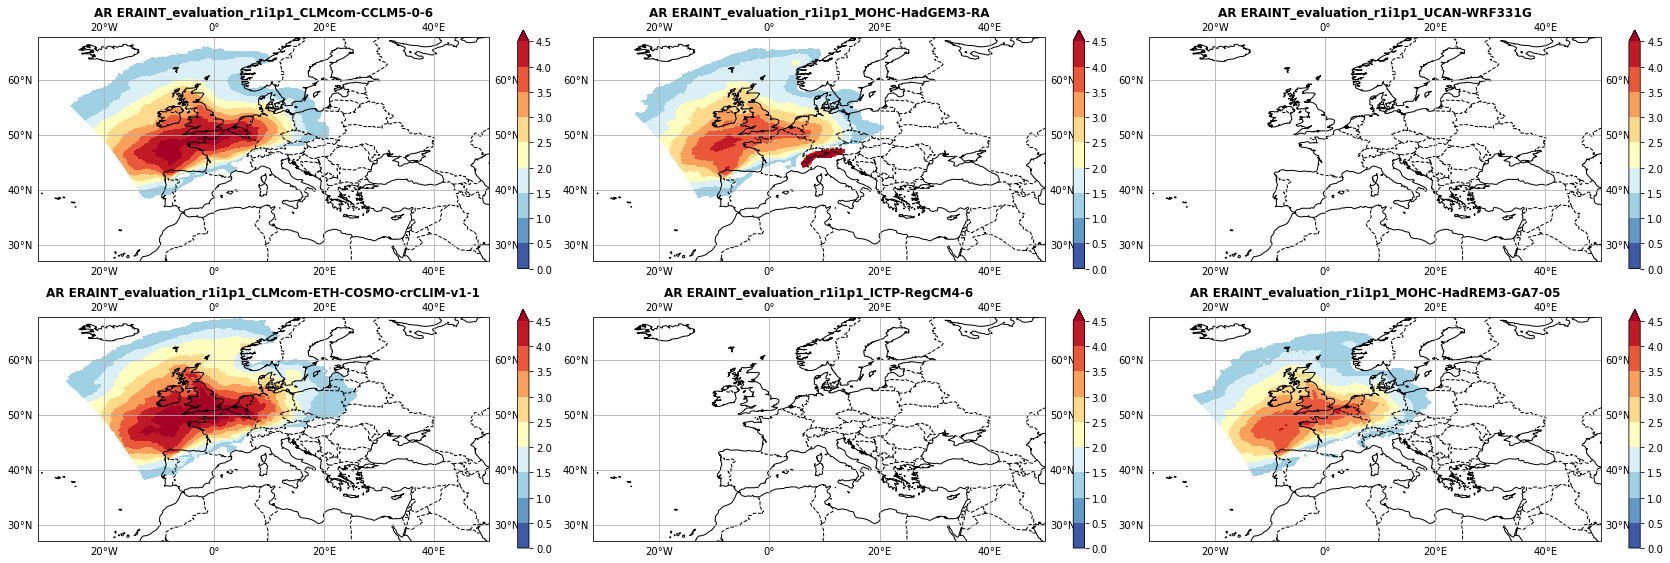

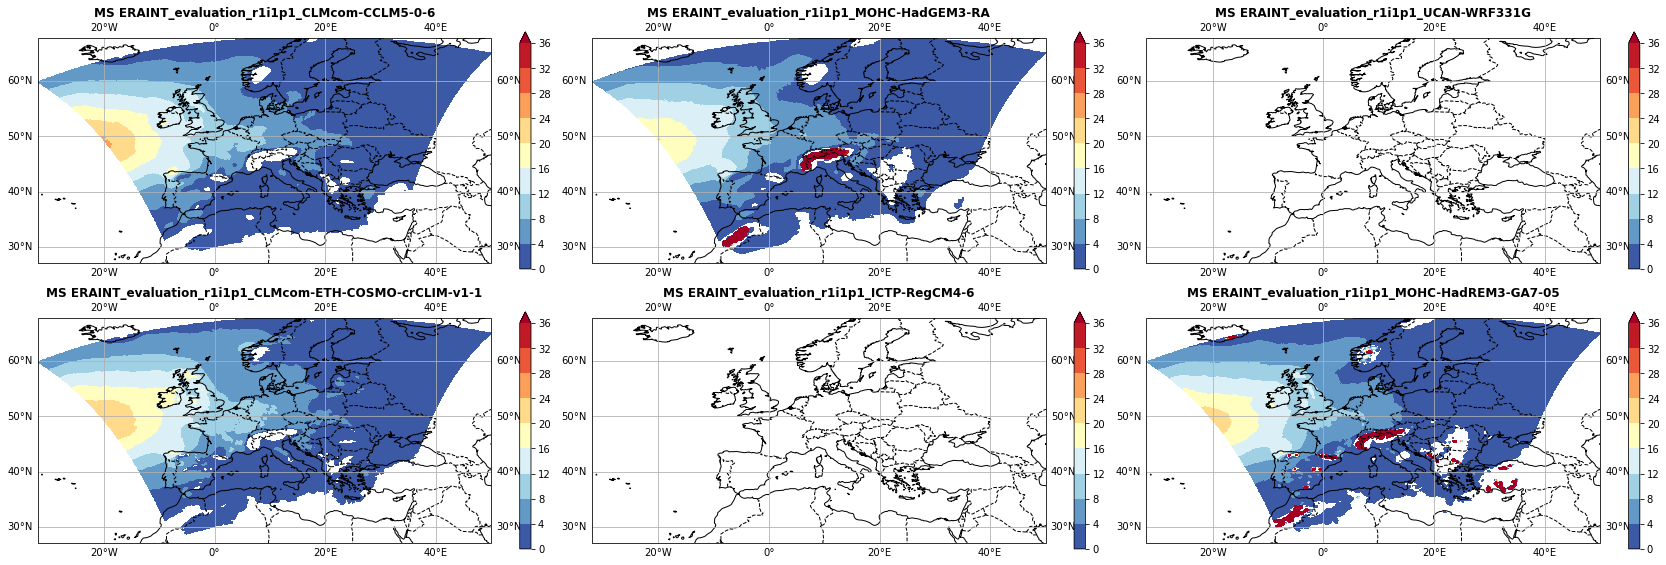

In [11]:
MIN     = [   2,         2,            0.2,            1,        1,         1,             1,  0.5]
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts','MoistureStreams','AR', 'MS'] 
level_s = [np.arange(0,100, 10), np.arange(0,140, 10), np.arange(0,12,1), np.arange(0,400,40)
          ,np.arange(0,40,4),np.arange(0,40,2),np.arange(0,5,0.5) ,np.arange(0, 40,4)]
proj = ccrs.PlateCarree()
for obj in range( n_obj):
    fig, ax = plt.subplots(2, 3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(24,8))
    print(Objects[obj])
    for ds in range(n_ds):
        nr = int(ds/3)
        nc = int((ds%3))
        #print(ds,nr, nc)
        
        DATAse = ObjectFrequency[ds,:,:,Objects.index(Objects[obj])]
        DATAse[DATAse < MIN[obj]] = np.nan     
             
        im=ax[nr,nc].contourf(Lon, Lat, DATAse, transform=ccrs.PlateCarree(), 
                               add_colorbar=True,levels=level_s[obj],extend='max', cmap='RdYlBu_r')
        fig.colorbar(im, ax=ax[nr,nc], shrink=0.9)
        ax[nr,nc].coastlines()
        ax[nr,nc].add_feature(cartopy.feature.BORDERS, linestyle='--') 
        #ax[nr][nc].set_title(Objects[obj] + ' ' + dataset[ds])
        ax[nr][nc].set_title(Objects[obj] + " " + dataset[ds][6:], fontweight='bold')#, color= 'blue')
        xl = ax[nr,nc].gridlines(draw_labels=True)
        plt.tight_layout()
            

Cyclones


/glade/scratch/mingge/ipykernel_15284/1107569322.py:89: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs, cax = CbarAx, orientation='horizontal', extend='max') #, ticks=clevs),


Anticyclones
MoistureStreams
Fronts
Anviles
Precipitation
AR
MS
        Plot map to: /glade/u/home/mingge/EURO-CORDEX/ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_annual_feature_frequencies.pdf


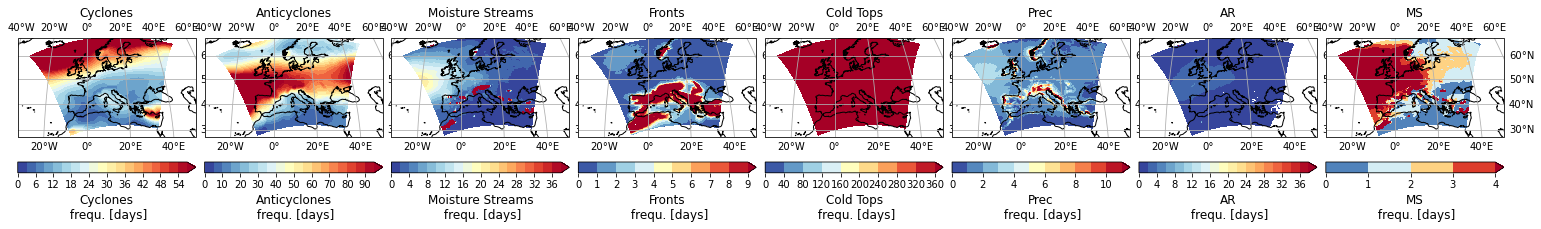

In [69]:

fig = plt.figure(figsize=(24,3))
rgsLableABC=list(string.ascii_lowercase)
gs1 = gridspec.GridSpec(1,len(Objects))
gs1.update(left=0.10, right=0.96,
            bottom=0.10, top=0.93,
            wspace=0.05, hspace=0.1)

if dataset == 'ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G':
    ObjectsSort = ['Cyclones','Anticyclones', 'Fronts','Anviles','Precipitation']
else:
    ObjectsSort = ['Cyclones','Anticyclones','MoistureStreams','Fronts','Anviles','Precipitation', 'AR', 'MS'] 

for st in range(len(ObjectsSort)):    
#for st in range(len(Objects)):
    if ObjectsSort[st] == 'Cyclones':
        DATA = annualObjectFrequency[:,:,:,Objects.index('Cyclones')]
        Levels = np.arange(0,60,3)
        MIN = 2
        Label = 'Cyclones'
    elif ObjectsSort[st] == 'Anticyclones':
        DATA = annualObjectFrequency[:,:,:,Objects.index('Anticyclones')]
        Levels = np.arange(0,100,5)
        MIN = 2
        Label = 'Anticyclones'
    elif ObjectsSort[st] == 'MoistureStreams':
        DATA = annualObjectFrequency[:,:,:,Objects.index('MoistureStreams')]
        Levels = np.arange(0,40,2)
        MIN = 1
        Label = 'Moisture Streams'
    elif ObjectsSort[st] == 'Fronts':
        DATA = annualObjectFrequency[:,:,:,Objects.index('Fronts')]
        Levels = np.arange(0,10,1)
        MIN = 0.2
        Label = 'Fronts'
    elif ObjectsSort[st] == 'Anviles':
        DATA = annualObjectFrequency[:,:,:,Objects.index('Anviles')]
        Levels = np.arange(0,400,40)
        MIN = 1
        Label = 'Cold Tops'
    elif ObjectsSort[st] == 'Precipitation':
        DATA = annualObjectFrequency[:,:,:,Objects.index('Precipitation')]
        Levels = np.arange(0,12,1)
        MIN = 0.2
        Label = 'Prec'
    elif ObjectsSort[st] == 'AR':
        DATA = annualObjectFrequency[:,:,:,Objects.index('AR')]
        Levels = np.arange(0,40,2)
        MIN = 1
        Label = 'AR'
    elif ObjectsSort[st] == 'MS':
        DATA = annualObjectFrequency[:,:,:,Objects.index('MS')]
        Levels = np.arange(0,5,1)
        MIN = 0.5
        Label = 'MS'
    
    
    MIN = 0
    
    print(ObjectsSort[st])
    for se in range(1):
        days = 365
        DATAse = np.nanmean(DATA, axis = 0)*days
        DATAse[DATAse <= MIN] = np.nan
        #print('max=', DATAse.max())
        proj = ccrs.Robinson() 
        ax = plt.subplot(gs1[se,st], projection=proj)
        pos1 = ax.get_position()
        cs = plt.contourf(Lon,Lat,DATAse, transform=ccrs.PlateCarree(), levels=Levels,extend='max', cmap='RdYlBu_r') # levels=Levels,)#, cmap='hot_r')
        #plt.title(rgsLableABC[se+st*4]+')  '+Label)
        plt.title(Label)
        
        ax.coastlines()
        if (se == 0):# & (st == 0):
            gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            gl.left_labels = False
        else:
            gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
            gl.top_labels = gl.right_labels = gl.left_labels = gl.bottom_labels = False
            
        if se == 0:
            #4-tuple of floats rect = [left, bottom, width, height]
            #CbarAx = plt.axes([pos1.x0-0.01, pos1.y0, 0.005, pos1.height])
            CbarAx = plt.axes([pos1.x0, 0.12, pos1.width, 0.05])
            cb = plt.colorbar(cs, cax = CbarAx, orientation='horizontal', extend='max') #, ticks=clevs), 
            cb.set_label(Label+'\n frequ. [days]', fontsize=12)

sPlotFile=sPlotFile
sPlotName= dataset + '_annual_feature_frequencies.pdf'
if os.path.isdir(sPlotFile) != 1:
    subprocess.call(["mkdir","-p",sPlotFile])
print('        Plot map to: '+ sPlotFile+sPlotName)
fig.savefig(sPlotFile+sPlotName, bbox_inches='tight')

     